# SVM Model for Text Classification
##### Using SVM model to classify text documents into subject categories

### Import the 20 New Groups data set from the scikit-learn library
* Data comprises a number of emails, articles and other text documents
* Each document falls into one of 20 categories of "News"
* Use a classification model to predict the news category given the document text

In [1]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [2]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

#### View the first document in our data set

In [3]:
print(twenty_train.data[0]) 

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







#### View all the categories

In [4]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### The target is represented by numbers

In [5]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

#### Create a bag of words from our document list

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

#### View the word counts for the first document

In [7]:
print(X_train_counts[0])

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


#### Get TF-IDF Weights using TfidfTransformer
This is different from TfidfVectorizer:
* TfidfVectorizer takes in a list of documents as input and produces a TF-IDF weighted bag of words
* TfidfTransformer takes in a regular bag of words and creates a TF-IDF weighted bag of words
* TfidfVectorizer == CountVectorizer + TfidfTransformer

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

#### Viewing the TF-IDF weights for first document

In [9]:
print(X_train_tfidf[0])

  (0, 128420)	0.04278499079283093
  (0, 128402)	0.05922294083277842
  (0, 128026)	0.060622095889758885
  (0, 124931)	0.08882569909852546
  (0, 124031)	0.10798795154169122
  (0, 123989)	0.08207027465330353
  (0, 123984)	0.036854292634593756
  (0, 123796)	0.049437556160455476
  (0, 123292)	0.14534718515938805
  (0, 123162)	0.2597090245735688
  (0, 118983)	0.037085978050619146
  (0, 118280)	0.2118680720828169
  (0, 115475)	0.042472629883573
  (0, 114731)	0.14447275512784058
  (0, 114688)	0.06214070986309586
  (0, 114579)	0.03671830826216751
  (0, 114455)	0.12287762616208957
  (0, 114428)	0.05511105154696676
  (0, 113986)	0.17691750674853082
  (0, 111322)	0.01915671802495043
  (0, 109581)	0.10809248404447917
  (0, 109271)	0.10844724822064673
  (0, 108252)	0.07526015712540636
  (0, 106116)	0.09869734624201922
  (0, 104813)	0.08462829788929047
  :	:
  (0, 56979)	0.057470154074851294
  (0, 51793)	0.13412921037839678
  (0, 51730)	0.09714744057976722
  (0, 50527)	0.054614286588587246
  (0, 5011

#### Create a Linear Support Vector Classifier
* penalty specifies whether to use L1 norm or L2 norm
    * Like with Lasso and Ridge, choose whether to minimize sum of absolute values or sum of squares of coefficients
* dual specifies whether to solve the primal or dual optimization problem
    * A primal optimization problem (e.g. increase revenue) can have an equivalent dual problem (e.g. reduce costs) (this is a gross oversimplification - a lot of math needed to explain in detail)
    * In our example, the primal optimization could be to maximize distance between our model and nearest points on either side of it. This will have a corresponding dual optimization problem
    * scikit-learn recommends that dual=False when there are more samples than features (which is the case in this example)
* tol represents a tolerance for the algorithm to consider when trying to maximize or minimize an ojective function
    * if the model is within the tolerance of the maximum or minimum, it is not refined further

In [20]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty="l2", dual=False, tol=1e-3)
clf_svc.fit(X_train_tfidf, twenty_train.target)
clf_svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.001,
 'verbose': 0}

#### Alternatively, a scikit-learn Pipeline can be used
* Pipeline is a sequence of transformations with an estimator specified in the final step
* The output of one transformation is passed as input to the next transformation
* The pipeline returns a model of the type specified in the estimator
* When the fit() method of the model is called with arguments, the arguments are passed through the transformation steps before actually being applied to the model


In [11]:
from sklearn.pipeline import Pipeline

clf_svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',LinearSVC(penalty="l2", dual=False, tol=0.001))
])

In our example:
* we pass the document corpus and the labels to the pipeline classifier
* The CountVectorizer takes the corpus and creates a bag of words
* The TfidfTransformer takes the bag of words and produces a TF-IDF weighted bag
* The LinearSVC model applies the fit method with the TF-IDF weighted bag and the labels

In [12]:
clf_svc_pipeline.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(dual=False, tol=0.001))])

#### Obtain the test data which we will use to make predictions

In [13]:
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

#### Make the predictions using our classifier

In [14]:
predicted = clf_svc_pipeline.predict(twenty_test.data)

#### Compute the accuracy of the model
Remember, there are 20 categories, so wild guesses will result in an accuracy of about 0.05

In [15]:
from sklearn.metrics import accuracy_score

acc_svm = accuracy_score(twenty_test.target, predicted)

In [16]:
acc_svm

0.8534253850238981

#### How good is our model if we just used the word counts without transforming to TF-IDF weights?

In [17]:
clf_svc_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf',LinearSVC(penalty="l2", dual=False, tol=0.001))
])

In [18]:
clf_svc_pipeline.fit(twenty_train.data, twenty_train.target)
predicted = clf_svc_pipeline.predict(twenty_test.data)

acc_svm = accuracy_score(twenty_test.target, predicted)
acc_svm

0.798858204992034

#### Summary:

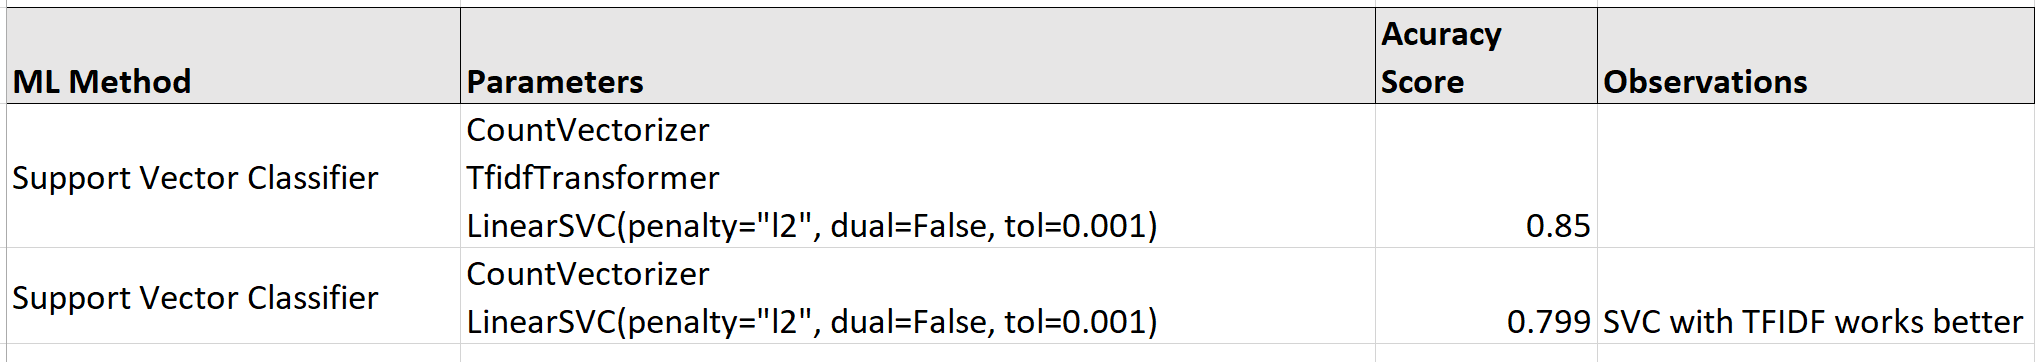